# Project Description 

You have received an analytical task from an international online store. Your predecessor failed to complete this task: he started running A/B testing before eventually quitting his job. He only left behind the technical specifications and the results of the experiment he conducted.

# Technical Description

* Experiment Name: **recommender_system_test**

* Groups: **A (control), B (new payment funnel)**

* Experiment Goal: **test changes related to the introduction of an enhanced recommendation system**

* Experiment Start Date: **07-12-2020**

* Date they stopped accepting new users: **21-12-2020**

* Experiment End Date: **01-01-2021**

* Audience: **15% new users from the European Union region**

* Expected Outcome: Within 14 days after registration, users should show an increase in conversion to product page views (events or product_page), activities of adding items to the shopping cart (product_cart), and purchases (purchase). **At each stage of the funnel product_page → product_cart → purchase, there should be a minimum increase of 10%.**

* Expected Number of Experiment Participants: **6000**

* Download the test data, check if it matches the expected outcomes, and analyze the results.

# Project Goals

- Reviewing the job of analyzing A/B testing from the previous person
- Analyzing the user behavior that contributes revenue to the store
- Analyzing the Customer Journey of the store

## Library 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth

## Data Import and Pre-processing Data

We will check each dataset provided one by one and examine the data types/missing data.

### Project Marketing Event

In [2]:
df_marketing_event = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
df_marketing_event.sort_values('start_dt')

,name,regions,start_dt,finish_dt
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11
11,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01
4,4th of July Promo,N.America,2020-07-04,2020-07-11
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07


In [3]:
df_marketing_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [4]:
df_marketing_event.describe()

,name,regions,start_dt,finish_dt
count,14,14,14,14
unique,14,6,14,14
top,Black Friday Ads Campaign,APAC,2020-02-14,2020-11-12
freq,1,4,1,1


We can see that the data types are not quite appropriate for "start_dt" and "finish_dt". They need to be changed to datetime.

In [5]:
column_0 = ['start_dt', 'finish_dt']

for i in column_0:
    df_marketing_event[i] = pd.to_datetime(df_marketing_event[i], format='%Y-%m-%d')
    
df_marketing_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


In [6]:
df_marketing_event.duplicated().sum()

0

Now that the data types are correct and there are no duplicates, we can proceed to the next dataset.

### Event Upd

In [7]:
df_event_upd = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
df_event_upd

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [8]:
df_event_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [9]:
df_event_upd.describe()

,details
count,60314.000000
mean,23.881219
std,72.228884
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


Yes, "event_dt" should be changed to the datetime data type.

In [10]:
df_event_upd['event_dt'] = pd.to_datetime(df_event_upd['event_dt'])
df_event_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [11]:
df_event_upd.duplicated().sum()

0

Great! Now you can proceed to the next dataset. If you have any specific actions or analyses you'd like to perform on the next dataset

### New User

In [12]:
df_new_user = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
df_new_user

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
58698,1DB53B933257165D,2020-12-20,EU,Android
58699,538643EB4527ED03,2020-12-20,EU,Mac
58700,7ADEE837D5D8CBBD,2020-12-20,EU,PC
58701,1C7D23927835213F,2020-12-20,EU,iPhone


In [13]:
df_new_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [14]:
df_new_user.describe()

,user_id,first_date,region,device
count,58703,58703,58703,58703
unique,58703,17,4,4
top,45C3D84B8CA72DCB,2020-12-21,EU,Android
freq,1,6077,43396,26159


"first_date" needs to be changed to the correct data type.

In [15]:
df_new_user['first_date'] = pd.to_datetime(df_new_user['first_date'])
df_new_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [16]:
df_new_user.duplicated().sum()

0

Great! Now you can proceed to the next dataset. If you have any specific actions or analyses you'd like to perform on the next dataset

### participant

In [17]:
df_participant = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')
df_participant

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test


In [18]:
column_1 = ['group','ab_test']

for i in column_1:
    print(df_participant[i].value_counts())
    print()

A    8214
B    6311
Name: group, dtype: int64

interface_eu_test          10850
recommender_system_test     3675
Name: ab_test, dtype: int64



In [19]:
df_participant.duplicated().sum()

0

The data types are correct, and there are no issues with duplication. Further analysis is needed.

## Exploration Data Analysis

We will examine user conversions from events, and we will analyze user behavior:

### Check New User Audience

In [20]:
df_new_user

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
58698,1DB53B933257165D,2020-12-20,EU,Android
58699,538643EB4527ED03,2020-12-20,EU,Mac
58700,7ADEE837D5D8CBBD,2020-12-20,EU,PC
58701,1C7D23927835213F,2020-12-20,EU,iPhone


In [21]:
df_audiens = df_new_user.groupby('region')['user_id'].agg('count').reset_index()
df_audiens = df_audiens.sort_values('user_id', ascending=False)
total_users = df_audiens['user_id'].sum()
df_audiens['percentage'] = (df_audiens['user_id']/ total_users) * 100
df_audiens

,region,user_id,percentage
2,EU,43396,73.924672
3,N.America,9051,15.418292
1,CIS,3130,5.331925
0,APAC,3126,5.325111


Seems like there's a discrepancy in the expected user distribution. The actual user distribution in the EU is 73%, not the planned 15%.

### User Conversion per Event

In [22]:
df_event_upd

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [23]:
df_event_upd_conv = df_event_upd.groupby('event_name').agg({'user_id':'count'}).reset_index().sort_values('user_id', ascending = False)
df_event_upd_conv

,event_name,user_id
0,login,182465
2,product_page,120862
3,purchase,60314
1,product_cart,60120


It looks like there's a general overview of the generated events. Out of approximately 182,000 logins, around 60,000 resulted in purchases, indicating a decent conversion. However, there seems to be an anomaly as the number of purchases is higher than the number of products added to the cart. This anomaly needs further investigation.

In [24]:
df_event_upd_conv = df_event_upd.groupby('event_name').agg({'user_id':'nunique'}).reset_index().sort_values('user_id', ascending = False)
df_event_upd_conv

,event_name,user_id
0,login,58696
2,product_page,38929
3,purchase,19568
1,product_cart,19284


Looking at the table above, we have unique users for each event, with 58,000 unique users in total. Out of these, 19,000 made purchases, which is a decent result. However, the number of purchases is higher than the number of items added to the cart. We need to investigate what these users are doing to understand this behavior better.

In [25]:
users = df_event_upd.pivot_table(index='user_id', columns='event_name', values='event_dt',aggfunc='min')
users

event_name,login,product_cart,product_page,purchase
user_id,,,,
0001710F4DDB1D1B,2020-12-14 20:20:40,2020-12-14 20:20:42,2020-12-14 20:20:41,NaT
000199F1887AE5E6,2020-12-14 09:56:09,2020-12-14 09:56:11,2020-12-14 09:56:09,2020-12-14 09:56:09
0002499E372175C7,2020-12-22 03:49:52,NaT,2020-12-22 03:49:55,2020-12-22 03:49:52
0002CE61FF2C4011,2020-12-07 04:37:36,2020-12-07 04:37:37,2020-12-07 04:37:42,NaT
000456437D0EFFE1,2020-12-15 11:25:03,NaT,2020-12-15 11:25:04,NaT
...,...,...,...,...
FFF7A7BAF44FE9B4,2020-12-19 11:10:03,NaT,NaT,NaT
FFF8FDBE2FE99C91,2020-12-20 04:53:50,NaT,2020-12-20 04:53:51,2020-12-20 04:53:50
FFF91B6C5431F375,2020-12-14 22:12:04,2020-12-14 22:12:04,NaT,NaT


It turns out that there are users who make purchases directly without adding items to the cart.

In [26]:
direct_purchase_mask = (users['login'].isna() & users['product_page'].isna() & users['product_cart'].isna()&  users['purchase'].notna() )
direct_purchases = users[direct_purchase_mask]
direct_purchases

event_name,login,product_cart,product_page,purchase
user_id,,,,
2765321AC15BA00A,NaT,NaT,NaT,2020-12-07 08:57:39
5FF8B6AB257B404F,NaT,NaT,NaT,2020-12-07 04:17:47
7A3913A11D32E4B0,NaT,NaT,NaT,2020-12-07 08:47:36
9C0BBD5250E4F142,NaT,NaT,NaT,2020-12-07 03:40:37
B80297D6570EA5FE,NaT,NaT,NaT,2020-12-07 05:13:35
B85380A609C96C7D,NaT,NaT,NaT,2020-12-07 17:45:25
CCB483B3A098DC5D,NaT,NaT,NaT,2020-12-07 08:54:40


In [27]:
direct_purchase_wo_pc = (users['login'].notna() & users['product_page'].notna() & users['product_cart'].isna()&  users['purchase'].notna())
direct_purchases_wo_pc = users[direct_purchase_wo_pc]
direct_purchases_wo_pc

event_name,login,product_cart,product_page,purchase
user_id,,,,
0002499E372175C7,2020-12-22 03:49:52,NaT,2020-12-22 03:49:55,2020-12-22 03:49:52
000921BDA987CB74,2020-12-07 08:03:38,NaT,2020-12-07 08:03:39,2020-12-07 08:03:38
0010A1C096941592,2020-12-17 21:07:27,NaT,2020-12-17 21:07:27,2020-12-17 21:07:27
00156152FF65F950,2020-12-18 10:35:06,NaT,2020-12-18 10:35:07,2020-12-18 10:35:06
00159C60CD6F69B4,2020-12-21 02:17:14,NaT,2020-12-21 02:17:16,2020-12-21 02:17:14
...,...,...,...,...
FFDE80D2D1280A97,2020-12-16 02:30:34,NaT,2020-12-16 02:30:36,2020-12-16 02:30:34
FFE328FECAF08350,2020-12-22 23:16:04,NaT,2020-12-22 23:16:04,2020-12-22 23:16:04
FFE95A70AA35C2FC,2020-12-20 04:36:51,NaT,2020-12-20 04:36:54,2020-12-20 04:36:51


In [28]:
direct_purchase_wo_pg = (users['login'].notna() & users['product_page'].isna() & users['product_cart'].notna()&  users['purchase'].notna())
direct_purchases_wo_pg = users[direct_purchase_wo_pg]
direct_purchases_wo_pg

event_name,login,product_cart,product_page,purchase
user_id,,,,
00197A9C3EBC0611,2020-12-14 03:57:53,2020-12-14 03:57:55,NaT,2020-12-14 03:57:53
004C5334B579C945,2020-12-14 10:32:34,2020-12-14 10:32:34,NaT,2020-12-14 10:32:34
005E63051BD0CE6B,2020-12-09 03:07:25,2020-12-09 03:07:27,NaT,2020-12-09 03:07:25
0085CC67907F592C,2020-12-12 13:17:25,2020-12-12 13:17:25,NaT,2020-12-12 13:17:25
00894E623B4C9A44,2020-12-16 04:45:56,2020-12-16 04:45:57,NaT,2020-12-16 04:45:56
...,...,...,...,...
FF38A27DE80D75A6,2020-12-22 03:18:17,2020-12-22 03:18:18,NaT,2020-12-22 03:18:17
FF7AD57900F6CA7A,2020-12-08 11:12:14,2020-12-08 11:12:14,NaT,2020-12-08 11:12:14
FF7CE4E5903CDD5C,2020-12-18 09:52:13,2020-12-18 09:52:14,NaT,2020-12-18 09:52:13


In [29]:
direct_purchase_wo_pg_pc = (users['login'].notna() & users['product_page'].isna() & users['product_cart'].isna()&  users['purchase'].notna())
direct_purchase_wo_pg_pc= users[direct_purchase_wo_pg_pc]
direct_purchase_wo_pg_pc

event_name,login,product_cart,product_page,purchase
user_id,,,,
000C9C937826F4D9,2020-12-17 18:52:01,NaT,NaT,2020-12-17 18:52:01
001667D375556EC1,2020-12-21 05:48:54,NaT,NaT,2020-12-21 05:48:54
0016FCBA98363D82,2020-12-13 07:59:08,NaT,NaT,2020-12-13 07:59:08
001D232E40BCF4FD,2020-12-23 09:53:25,NaT,NaT,2020-12-23 09:53:25
002B34C8665CEA65,2020-12-12 03:17:27,NaT,NaT,2020-12-12 03:17:27
...,...,...,...,...
FF875E82AB4E0E63,2020-12-17 13:06:35,NaT,NaT,2020-12-17 13:06:35
FFA72985E689ABBB,2020-12-15 20:18:07,NaT,NaT,2020-12-15 20:18:07
FFBCD81DC867F6E2,2020-12-07 08:15:26,NaT,NaT,2020-12-07 08:15:26


In [30]:
direct_purchase_wo_login = (users['login'].isna() & users['product_page'].notna() & users['product_cart'].notna()&  users['purchase'].notna())
direct_purchase_wo_login = users[direct_purchase_wo_login]
direct_purchase_wo_login

event_name,login,product_cart,product_page,purchase
user_id,,,,


In [31]:
purchase_complete = (users['login'].notna() & users['product_page'].notna() & users['product_cart'].notna()&  users['purchase'].notna())
purchase_complete = users[purchase_complete]
purchase_complete

event_name,login,product_cart,product_page,purchase
user_id,,,,
000199F1887AE5E6,2020-12-14 09:56:09,2020-12-14 09:56:11,2020-12-14 09:56:09,2020-12-14 09:56:09
000F1B87E2F87740,2020-12-22 02:40:16,2020-12-22 02:40:17,2020-12-22 02:40:18,2020-12-22 02:40:16
000FE05E702DDCCC,2020-12-16 10:05:44,2020-12-16 10:05:46,2020-12-16 10:05:45,2020-12-16 10:05:44
00187B30B10E5180,2020-12-14 00:45:10,2020-12-14 00:45:14,2020-12-14 00:45:11,2020-12-14 00:45:10
004E558F9F780BB7,2020-12-13 19:41:20,2020-12-13 19:41:20,2020-12-13 19:41:21,2020-12-13 19:41:20
...,...,...,...,...
FFAC62ED42E92674,2020-12-21 03:39:12,2020-12-21 03:39:13,2020-12-21 03:39:12,2020-12-21 03:39:12
FFBB7190FBF84FC0,2020-12-14 12:54:16,2020-12-14 12:54:19,2020-12-14 12:54:16,2020-12-14 12:54:16
FFC959E622C4AF80,2020-12-22 22:40:25,2020-12-22 22:40:26,2020-12-22 22:40:26,2020-12-22 22:40:25


In [32]:
direct_purchases['purchase'].count()

7

In [33]:
print('ratio yang melakukan pembelian langsung:', (direct_purchases['purchase'].count() / users['login'].count())*100 ,"%")

ratio yang melakukan pembelian langsung: 0.011925855254191087 %


In [34]:
direct_purchases_wo_pg['purchase'].count()

2151

In [35]:
print('ratio yang melakukan pembelian tanpa ke product page:', (direct_purchases_wo_pg['purchase'].count() / users['login'].count())*100 ,"%")

ratio yang melakukan pembelian tanpa ke product page: 3.6646449502521468 %


In [36]:
direct_purchases_wo_pc['purchase'].count()

9065

In [37]:
print('ratio yang melakukan pembelian tanpa ke product cart:', (direct_purchases_wo_pc['purchase'].count() / users['login'].count())*100 ,"%")

ratio yang melakukan pembelian tanpa ke product cart: 15.443982554177458 %


In [38]:
direct_purchase_wo_pg_pc['purchase'].count()

4097

In [39]:
print('ratio yang melakukan pembelian dari login tanpa product page & product cart:', (direct_purchase_wo_pg_pc['purchase'].count() / users['login'].count())*100 ,"%")

ratio yang melakukan pembelian dari login tanpa product page & product cart: 6.980032710917268 %


In [40]:
direct_purchase_wo_login['purchase'].count()

0

All users who have performed product page/product cart actions have been confirmed to be logged in, as the result is 0.

In [41]:
purchase_complete['purchase'].count()

4248

In [42]:
print('The ratio of users who made a purchase from login until purchases :', (purchase_complete['purchase'].count() / users['login'].count())*100 ,"%")

The ratio of users who made a purchase from login until purchases : 7.237290445686248 %


The users of this application have a variety of purchasing behaviors. Some make direct purchases, while others don't add items to the cart, and some proceed from the product page, etc.

### Event Distribution per Users in all Samples

Let's check the average number of events per user.

In [43]:
mean_event = df_event_upd.groupby('user_id').agg({'event_name' : 'count'}).reset_index().sort_values('event_name',ascending=False)
mean_event

,user_id,event_name
37526,A3917F81482141F2,36
7403,203773F2A53233A8,32
3965,11285A53EC2B2042,32
42807,BA87FD8D70D63CC6,32
12472,365C8B51237C61AF,32
...,...,...
27886,7A2073BD661AF70D,1
15918,452225689815A700,1
45177,C5293D68FDC0D086,1
52381,E48564406C361C95,1


<AxesSubplot:ylabel='Count'>

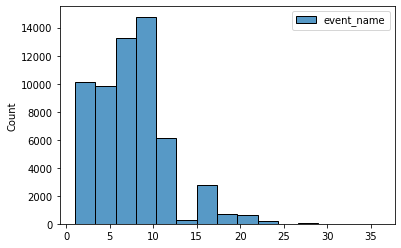

In [44]:
sns.histplot(mean_event, bins = 15)

In [45]:
print(mean_event['event_name'].mean())

7.218728174028585


The average user engages in events around 7 times. There are nearly 40,000 users who engage in events between 5 and 10 times, indicating a relatively even distribution.

### Users Distribution Analysis per Events

In [46]:
users_dist = users.reset_index()
users_dist

event_name,user_id,login,product_cart,product_page,purchase
0,0001710F4DDB1D1B,2020-12-14 20:20:40,2020-12-14 20:20:42,2020-12-14 20:20:41,NaT
1,000199F1887AE5E6,2020-12-14 09:56:09,2020-12-14 09:56:11,2020-12-14 09:56:09,2020-12-14 09:56:09
2,0002499E372175C7,2020-12-22 03:49:52,NaT,2020-12-22 03:49:55,2020-12-22 03:49:52
3,0002CE61FF2C4011,2020-12-07 04:37:36,2020-12-07 04:37:37,2020-12-07 04:37:42,NaT
4,000456437D0EFFE1,2020-12-15 11:25:03,NaT,2020-12-15 11:25:04,NaT
...,...,...,...,...,...
58698,FFF7A7BAF44FE9B4,2020-12-19 11:10:03,NaT,NaT,NaT
58699,FFF8FDBE2FE99C91,2020-12-20 04:53:50,NaT,2020-12-20 04:53:51,2020-12-20 04:53:50
58700,FFF91B6C5431F375,2020-12-14 22:12:04,2020-12-14 22:12:04,NaT,NaT
58701,FFFAB034A09DCC28,2020-12-18 12:00:53,NaT,2020-12-18 12:00:55,NaT


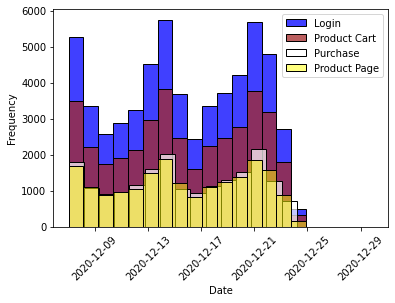

<Figure size 1440x1440 with 0 Axes>

In [47]:
sns.histplot(data=users_dist, x='login', bins=20, color='blue', label='Login')
sns.histplot(data=users_dist, x='product_page', bins=20, color='brown', label='Product Cart')
sns.histplot(data=users_dist, x='purchase', bins=20, color='white', label='Purchase', alpha = 0.7)
sns.histplot(data=users_dist, x='product_cart', bins=20, color='yellow', label='Product Page', alpha = 0.5)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.figure(figsize=(20, 20))
plt.show()

We can see from the distribution of events above that there are some dates where the frequency is higher compared to other dates, such as December 21st, December 14th, and December 7th. If we look, these days fall on a Monday. Perhaps the items sold have a weekly purchasing pattern.

The distribution of each event is quite even, and the distribution of users from login to purchase is almost similar for product page and purchase.

### Data User Merger

In [48]:
merged_dataset = users.merge(df_new_user, on='user_id', how='left')
merged_dataset = merged_dataset.merge(df_participant, on='user_id' , how = 'left')
merged_dataset

,user_id,login,product_cart,product_page,purchase,first_date,region,device,group,ab_test
0,0001710F4DDB1D1B,2020-12-14 20:20:40,2020-12-14 20:20:42,2020-12-14 20:20:41,NaT,2020-12-14,EU,Android,NaN,NaN
1,000199F1887AE5E6,2020-12-14 09:56:09,2020-12-14 09:56:11,2020-12-14 09:56:09,2020-12-14 09:56:09,2020-12-14,EU,Android,NaN,NaN
2,0002499E372175C7,2020-12-22 03:49:52,NaT,2020-12-22 03:49:55,2020-12-22 03:49:52,2020-12-22,N.America,PC,NaN,NaN
3,0002CE61FF2C4011,2020-12-07 04:37:36,2020-12-07 04:37:37,2020-12-07 04:37:42,NaT,2020-12-07,EU,Mac,A,interface_eu_test
4,000456437D0EFFE1,2020-12-15 11:25:03,NaT,2020-12-15 11:25:04,NaT,2020-12-15,EU,Android,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
59585,FFF7A7BAF44FE9B4,2020-12-19 11:10:03,NaT,NaT,NaT,2020-12-19,N.America,Android,NaN,NaN
59586,FFF8FDBE2FE99C91,2020-12-20 04:53:50,NaT,2020-12-20 04:53:51,2020-12-20 04:53:50,2020-12-20,EU,Android,NaN,NaN
59587,FFF91B6C5431F375,2020-12-14 22:12:04,2020-12-14 22:12:04,NaT,NaT,2020-12-14,EU,PC,NaN,NaN
59588,FFFAB034A09DCC28,2020-12-18 12:00:53,NaT,2020-12-18 12:00:55,NaT,2020-12-18,N.America,Android,NaN,NaN


### Checking Group Dataset

In [49]:
A_group = merged_dataset[merged_dataset['group'] == 'A']
A_group

,user_id,login,product_cart,product_page,purchase,first_date,region,device,group,ab_test
3,0002CE61FF2C4011,2020-12-07 04:37:36,2020-12-07 04:37:37,2020-12-07 04:37:42,NaT,2020-12-07,EU,Mac,A,interface_eu_test
16,0010A1C096941592,2020-12-17 21:07:27,NaT,2020-12-17 21:07:27,2020-12-17 21:07:27,2020-12-17,EU,Android,A,recommender_system_test
35,002412F1EB3F6E38,2020-12-09 09:35:20,NaT,2020-12-09 09:35:20,NaT,2020-12-09,EU,Mac,A,interface_eu_test
37,002540BE89C930FB,2020-12-08 18:05:24,2020-12-08 18:05:24,2020-12-08 18:05:24,NaT,2020-12-08,EU,Android,A,interface_eu_test
49,003346BB64227D0C,2020-12-17 05:24:01,NaT,NaT,NaT,2020-12-17,EU,Android,A,interface_eu_test
...,...,...,...,...,...,...,...,...,...,...
59534,FFC676CB3E0A60B8,2020-12-22 18:10:25,2020-12-22 18:10:26,2020-12-22 18:10:25,NaT,2020-12-22,EU,iPhone,A,interface_eu_test
59550,FFDA3BD9A090A179,2020-12-13 01:00:17,2020-12-13 01:00:17,2020-12-13 01:00:17,NaT,2020-12-13,EU,Android,A,interface_eu_test
59552,FFDC1BEFD27A66D5,2020-12-10 09:31:29,NaT,NaT,NaT,2020-12-10,EU,iPhone,A,interface_eu_test
59564,FFE600EEC4BA7685,2020-12-13 21:43:00,2020-12-13 21:43:01,2020-12-13 21:43:05,NaT,2020-12-13,EU,Android,A,interface_eu_test


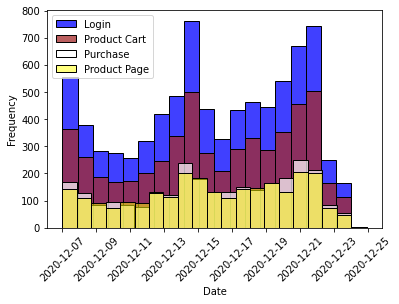

<Figure size 1440x1440 with 0 Axes>

In [50]:
sns.histplot(data=A_group, x='login', bins=20, color='blue', label='Login')
sns.histplot(data=A_group, x='product_page', bins=20, color='brown', label='Product Cart')
sns.histplot(data=A_group, x='purchase', bins=20, color='white', label='Purchase', alpha = 0.7)
sns.histplot(data=A_group, x='product_cart', bins=20, color='yellow', label='Product Page', alpha = 0.5)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.figure(figsize=(20, 20))
plt.show()

In [51]:
B_group = merged_dataset[merged_dataset['group'] == 'B']
B_group

,user_id,login,product_cart,product_page,purchase,first_date,region,device,group,ab_test
14,001064FEAAB631A1,2020-12-20 14:43:27,NaT,2020-12-20 14:43:28,NaT,2020-12-20,EU,Android,B,recommender_system_test
15,001064FEAAB631A1,2020-12-20 14:43:27,NaT,2020-12-20 14:43:28,NaT,2020-12-20,EU,Android,B,interface_eu_test
32,001E72F50D1C48FA,2020-12-17 15:44:05,NaT,2020-12-17 15:44:06,NaT,2020-12-17,EU,Mac,B,interface_eu_test
48,0031F1B5E9FBF708,2020-12-14 00:47:10,NaT,NaT,2020-12-14 00:47:10,2020-12-14,EU,Android,B,interface_eu_test
55,0036BE15EE4D319D,2020-12-21 01:56:05,NaT,NaT,NaT,2020-12-21,EU,PC,B,interface_eu_test
...,...,...,...,...,...,...,...,...,...,...
59563,FFE5B14BD55C1C5C,2020-12-19 07:11:39,2020-12-19 07:11:40,NaT,NaT,2020-12-19,EU,PC,B,interface_eu_test
59565,FFE7FC140521F5F6,2020-12-23 09:21:10,2020-12-23 09:21:10,2020-12-23 09:21:10,2020-12-23 09:21:10,2020-12-23,EU,PC,B,interface_eu_test
59573,FFEFC0E55C1CCD4F,2020-12-13 23:52:22,NaT,NaT,NaT,2020-12-13,EU,PC,B,interface_eu_test
59577,FFF28D02B1EACBE1,2020-12-16 08:24:56,2020-12-16 08:24:57,2020-12-16 08:24:57,NaT,2020-12-16,EU,PC,B,recommender_system_test


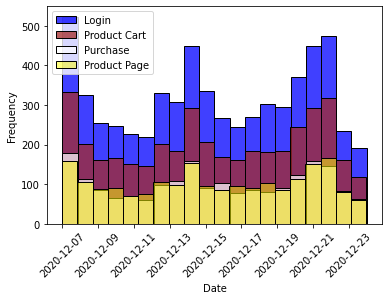

<Figure size 1440x1440 with 0 Axes>

In [52]:
sns.histplot(data=B_group, x='login', bins=20, color='blue', label='Login')
sns.histplot(data=B_group, x='product_page', bins=20, color='brown', label='Product Cart')
sns.histplot(data=B_group, x='purchase', bins=20, color='white', label='Purchase', alpha = 0.7)
sns.histplot(data=B_group, x='product_cart', bins=20, color='yellow', label='Product Page', alpha = 0.5)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.figure(figsize=(20, 20))
plt.show()

In [53]:
double_users = A_group.merge(B_group, on='user_id', how='inner')
double_users

,user_id,login_x,product_cart_x,product_page_x,purchase_x,first_date_x,region_x,device_x,group_x,ab_test_x,login_y,product_cart_y,product_page_y,purchase_y,first_date_y,region_y,device_y,group_y,ab_test_y
0,0082295A41A867B5,2020-12-16 07:06:32,2020-12-16 07:06:32,2020-12-16 07:06:33,2020-12-16 07:06:32,2020-12-16,EU,iPhone,A,recommender_system_test,2020-12-16 07:06:32,2020-12-16 07:06:32,2020-12-16 07:06:33,2020-12-16 07:06:32,2020-12-16,EU,iPhone,B,interface_eu_test
1,00E68F103C66C1F7,2020-12-18 16:05:40,2020-12-18 16:05:42,2020-12-18 16:05:40,NaT,2020-12-18,EU,PC,A,recommender_system_test,2020-12-18 16:05:40,2020-12-18 16:05:42,2020-12-18 16:05:40,NaT,2020-12-18,EU,PC,B,interface_eu_test
2,02313B9E82255F47,2020-12-14 02:47:59,2020-12-14 02:47:59,2020-12-14 02:47:59,NaT,2020-12-14,EU,Mac,A,recommender_system_test,2020-12-14 02:47:59,2020-12-14 02:47:59,2020-12-14 02:47:59,NaT,2020-12-14,EU,Mac,B,interface_eu_test
3,04F2CF340B4F3822,2020-12-16 10:09:22,NaT,NaT,NaT,2020-12-16,EU,PC,A,recommender_system_test,2020-12-16 10:09:22,NaT,NaT,NaT,2020-12-16,EU,PC,B,interface_eu_test
4,051D59BC38C3B3AA,2020-12-15 14:24:46,NaT,NaT,NaT,2020-12-15,EU,Mac,A,recommender_system_test,2020-12-15 14:24:46,NaT,NaT,NaT,2020-12-15,EU,Mac,B,interface_eu_test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,FE2AF0E94DBD470E,2020-12-21 07:25:52,NaT,2020-12-21 07:25:53,2020-12-21 07:25:52,2020-12-21,EU,Android,A,recommender_system_test,2020-12-21 07:25:52,NaT,2020-12-21 07:25:53,2020-12-21 07:25:52,2020-12-21,EU,Android,B,interface_eu_test
437,FE8F9858BBE502D9,2020-12-16 01:58:27,2020-12-16 01:58:31,NaT,NaT,2020-12-16,EU,PC,A,interface_eu_test,2020-12-16 01:58:27,2020-12-16 01:58:31,NaT,NaT,2020-12-16,EU,PC,B,recommender_system_test
438,FEA0C585A53E7027,2020-12-08 06:10:25,2020-12-08 06:10:25,2020-12-08 06:10:26,NaT,2020-12-08,EU,Android,A,interface_eu_test,2020-12-08 06:10:25,2020-12-08 06:10:25,2020-12-08 06:10:26,NaT,2020-12-08,EU,Android,B,recommender_system_test
439,FEC0BCA6C323872F,2020-12-18 09:13:03,2020-12-18 09:13:04,2020-12-18 09:13:04,NaT,2020-12-18,EU,PC,A,recommender_system_test,2020-12-18 09:13:03,2020-12-18 09:13:04,2020-12-18 09:13:04,NaT,2020-12-18,EU,PC,B,interface_eu_test


It turns out there are 441 users in both groups. However, if we look at the A/B test, it also has two groups, namely *recommender_system_test* and *interface_eu_test*.

In [54]:
interface_eu_test_group = merged_dataset[merged_dataset['ab_test'] == 'interface_eu_test']
interface_eu_test_group

,user_id,login,product_cart,product_page,purchase,first_date,region,device,group,ab_test
3,0002CE61FF2C4011,2020-12-07 04:37:36,2020-12-07 04:37:37,2020-12-07 04:37:42,NaT,2020-12-07,EU,Mac,A,interface_eu_test
15,001064FEAAB631A1,2020-12-20 14:43:27,NaT,2020-12-20 14:43:28,NaT,2020-12-20,EU,Android,B,interface_eu_test
32,001E72F50D1C48FA,2020-12-17 15:44:05,NaT,2020-12-17 15:44:06,NaT,2020-12-17,EU,Mac,B,interface_eu_test
35,002412F1EB3F6E38,2020-12-09 09:35:20,NaT,2020-12-09 09:35:20,NaT,2020-12-09,EU,Mac,A,interface_eu_test
37,002540BE89C930FB,2020-12-08 18:05:24,2020-12-08 18:05:24,2020-12-08 18:05:24,NaT,2020-12-08,EU,Android,A,interface_eu_test
...,...,...,...,...,...,...,...,...,...,...
59564,FFE600EEC4BA7685,2020-12-13 21:43:00,2020-12-13 21:43:01,2020-12-13 21:43:05,NaT,2020-12-13,EU,Android,A,interface_eu_test
59565,FFE7FC140521F5F6,2020-12-23 09:21:10,2020-12-23 09:21:10,2020-12-23 09:21:10,2020-12-23 09:21:10,2020-12-23,EU,PC,B,interface_eu_test
59573,FFEFC0E55C1CCD4F,2020-12-13 23:52:22,NaT,NaT,NaT,2020-12-13,EU,PC,B,interface_eu_test
59578,FFF28D02B1EACBE1,2020-12-16 08:24:56,2020-12-16 08:24:57,2020-12-16 08:24:57,NaT,2020-12-16,EU,PC,A,interface_eu_test


In [55]:
recommender_system_test_group = merged_dataset[merged_dataset['ab_test'] == 'recommender_system_test']
recommender_system_test_group

,user_id,login,product_cart,product_page,purchase,first_date,region,device,group,ab_test
14,001064FEAAB631A1,2020-12-20 14:43:27,NaT,2020-12-20 14:43:28,NaT,2020-12-20,EU,Android,B,recommender_system_test
16,0010A1C096941592,2020-12-17 21:07:27,NaT,2020-12-17 21:07:27,2020-12-17 21:07:27,2020-12-17,EU,Android,A,recommender_system_test
51,00341D8401F0F665,2020-12-21 11:14:50,NaT,NaT,NaT,2020-12-21,EU,iPhone,A,recommender_system_test
59,003DF44D7589BBD4,2020-12-17 06:17:49,2020-12-17 06:17:49,2020-12-17 06:17:49,NaT,2020-12-17,EU,Android,A,recommender_system_test
74,00505E15A9D81546,2020-12-14 17:28:32,NaT,NaT,NaT,2020-12-14,EU,Mac,A,recommender_system_test
...,...,...,...,...,...,...,...,...,...,...
59453,FF5B24BCE4387F86,2020-12-21 08:46:48,NaT,2020-12-21 08:46:49,2020-12-21 08:46:48,2020-12-21,EU,Android,A,recommender_system_test
59487,FF825C1D791989B5,2020-12-19 19:29:18,2020-12-19 19:29:18,NaT,NaT,2020-12-19,EU,PC,A,recommender_system_test
59493,FF8CF7057415EB29,2020-12-21 16:09:41,NaT,2020-12-21 16:09:41,NaT,2020-12-21,EU,Android,B,recommender_system_test
59519,FFAE9489C76F352B,2020-12-13 18:46:05,NaT,2020-12-13 18:46:06,NaT,2020-12-13,EU,Mac,A,recommender_system_test


From the above results, the experiment is stated to have 6000 data, but in fact, for the *recommender_system_test*, there are only 3675 users, while group B has 6300 users. It still doesn't match the expected 6000.

### Checking Your Data: Does it have any specific characteristics that need to be considered before starting A/B testing?

After conducting data exploration so far, there are a few things to consider before starting A/B Testing:

1. We observe that there are users who belong to both Group A and B. Therefore, before starting A/B testing, it is crucial to have clear and distinct user groupings with no overlap.
2. Regarding the experiment period, it's essential to avoid overlaps with marketing events. During the experiment, there are two events in the dataset: Christmas & New Year Promo for EU and N. America (from 2020-12-25 to 2021-01-03) and CIS New Year Gift Lottery (from 2020-12-30 to 2021-01-07).

## A/B Testing Evaluation

Checking the expected results within 14 days after registration, users should show an improvement. At each stage of the funnel (product_page → product_cart → purchase), there should be a minimum increase of 10%.

Let's create the dataset.

In [56]:
A_group['end_experiment'] = A_group['first_date'] + pd.to_timedelta(14, unit='d')

columns = ['login','product_cart','product_page','purchase']

for col in columns:
    A_group = A_group[~(A_group[col] > A_group['end_experiment'])]
    
A_group

/tmp/ipykernel_111/4240870830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_group['end_experiment'] = A_group['first_date'] + pd.to_timedelta(14, unit='d')


,user_id,login,product_cart,product_page,purchase,first_date,region,device,group,ab_test,end_experiment
3,0002CE61FF2C4011,2020-12-07 04:37:36,2020-12-07 04:37:37,2020-12-07 04:37:42,NaT,2020-12-07,EU,Mac,A,interface_eu_test,2020-12-21
16,0010A1C096941592,2020-12-17 21:07:27,NaT,2020-12-17 21:07:27,2020-12-17 21:07:27,2020-12-17,EU,Android,A,recommender_system_test,2020-12-31
35,002412F1EB3F6E38,2020-12-09 09:35:20,NaT,2020-12-09 09:35:20,NaT,2020-12-09,EU,Mac,A,interface_eu_test,2020-12-23
37,002540BE89C930FB,2020-12-08 18:05:24,2020-12-08 18:05:24,2020-12-08 18:05:24,NaT,2020-12-08,EU,Android,A,interface_eu_test,2020-12-22
49,003346BB64227D0C,2020-12-17 05:24:01,NaT,NaT,NaT,2020-12-17,EU,Android,A,interface_eu_test,2020-12-31
...,...,...,...,...,...,...,...,...,...,...,...
59534,FFC676CB3E0A60B8,2020-12-22 18:10:25,2020-12-22 18:10:26,2020-12-22 18:10:25,NaT,2020-12-22,EU,iPhone,A,interface_eu_test,2021-01-05
59550,FFDA3BD9A090A179,2020-12-13 01:00:17,2020-12-13 01:00:17,2020-12-13 01:00:17,NaT,2020-12-13,EU,Android,A,interface_eu_test,2020-12-27
59552,FFDC1BEFD27A66D5,2020-12-10 09:31:29,NaT,NaT,NaT,2020-12-10,EU,iPhone,A,interface_eu_test,2020-12-24
59564,FFE600EEC4BA7685,2020-12-13 21:43:00,2020-12-13 21:43:01,2020-12-13 21:43:05,NaT,2020-12-13,EU,Android,A,interface_eu_test,2020-12-27


Let's filter the users who are above 14 days. First, let's create a new column.

In [57]:
B_group['end_experiment'] = B_group['first_date'] + pd.to_timedelta(14, unit='d')

columns = ['login','product_cart','product_page','purchase']

for col in columns:
    B_group = B_group[~(B_group[col] > B_group['end_experiment'])]
    
B_group

/tmp/ipykernel_111/3958000527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B_group['end_experiment'] = B_group['first_date'] + pd.to_timedelta(14, unit='d')


,user_id,login,product_cart,product_page,purchase,first_date,region,device,group,ab_test,end_experiment
14,001064FEAAB631A1,2020-12-20 14:43:27,NaT,2020-12-20 14:43:28,NaT,2020-12-20,EU,Android,B,recommender_system_test,2021-01-03
15,001064FEAAB631A1,2020-12-20 14:43:27,NaT,2020-12-20 14:43:28,NaT,2020-12-20,EU,Android,B,interface_eu_test,2021-01-03
32,001E72F50D1C48FA,2020-12-17 15:44:05,NaT,2020-12-17 15:44:06,NaT,2020-12-17,EU,Mac,B,interface_eu_test,2020-12-31
48,0031F1B5E9FBF708,2020-12-14 00:47:10,NaT,NaT,2020-12-14 00:47:10,2020-12-14,EU,Android,B,interface_eu_test,2020-12-28
55,0036BE15EE4D319D,2020-12-21 01:56:05,NaT,NaT,NaT,2020-12-21,EU,PC,B,interface_eu_test,2021-01-04
...,...,...,...,...,...,...,...,...,...,...,...
59563,FFE5B14BD55C1C5C,2020-12-19 07:11:39,2020-12-19 07:11:40,NaT,NaT,2020-12-19,EU,PC,B,interface_eu_test,2021-01-02
59565,FFE7FC140521F5F6,2020-12-23 09:21:10,2020-12-23 09:21:10,2020-12-23 09:21:10,2020-12-23 09:21:10,2020-12-23,EU,PC,B,interface_eu_test,2021-01-06
59573,FFEFC0E55C1CCD4F,2020-12-13 23:52:22,NaT,NaT,NaT,2020-12-13,EU,PC,B,interface_eu_test,2020-12-27
59577,FFF28D02B1EACBE1,2020-12-16 08:24:56,2020-12-16 08:24:57,2020-12-16 08:24:57,NaT,2020-12-16,EU,PC,B,recommender_system_test,2020-12-30


It seems that users in groups A and B have not changed since registration, and their lifetime is less than 14 days. There is no dataset with any impact.

Now, we look at the conversion

In [63]:
event_counts = A_group[['login', 'product_cart', 'product_page', 'purchase']].count()
total_rows = len(A_group)

print('sum event :')
print()
print(event_counts)
print()
print('total user :',total_rows)

sum event :

login           8212
product_cart    2580
product_page    5418
purchase        2803
dtype: int64

total user : 8213


In [62]:
event_counts = B_group[['login', 'product_cart', 'product_page', 'purchase']].count()
total_rows = len(B_group)

print('sum event :')
print()
print(event_counts)
print()
print('total user :',total_rows)

sum event :

login           6309
product_cart    2067
product_page    4049
purchase        2038
dtype: int64

total user : 6310


From our analysis, it appears that groups A and B did not show a 10% improvement. There seems to be an error in the implementation.

### Z-Test

we need to perform z-test for experiment the statistics difference between portion group A and B

In [64]:
alpha = .05  # significance level

# Variables A: purchase 2803, login (leads) 8212
# Variables B: purchase 2038, login (leads) 6309

purchases_A_B = np.array([2803, 2038])
leads_A_B = np.array([8212, 6309])

p1 = purchases_A_B[0] / leads_A_B[0]
p2 = purchases_A_B[1] / leads_A_B[1]
p_combined = (purchases_A_B[0] + purchases_A_B[1]) / (leads_A_B[0] + leads_A_B[1])
difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / leads_A_B[0] + 1 / leads_A_B[1]))

distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)

if (p_value < alpha):
    print("Reject the null hypothesis: there is a significant difference between the proportions")
else:
    print("Fail to reject the null hypothesis: there is no reason to consider that the proportions are different")


p-value:  0.020415767510504113
Reject the null hypothesis: there is a significant difference between the proportions


we can see the results of z-test between A and B, there's significant difference

## Kesimpulan

Your analysis provides a comprehensive overview of the user data and potential areas for improvement. Here's a polished version:

---

From the data analysis, it's evident that a significant proportion of new users originate from the European Union, accounting for 73% of new users, while the lowest engagement comes from APAC. On average, users perform approximately 7 events, suggesting that some users may repeat certain events, possibly making repeated purchases.

The conversion results from the event data appear promising, with a total of 58,000 unique users and 19,000 making purchases—indicating positive engagement. Notably, the customer journey for purchases varies widely, with a substantial number of users proceeding from login directly to purchase, constituting 15% of total purchases. This differs from the planned journey, followed by only 7% of users.

The distribution of events is generally even, except for the product page-to-purchase transition. This suggests that there may be room for improvement in maximizing product page interactions.

Upon further analysis, the distribution remains consistent between groups A and B. However, it's crucial to address the issue of users appearing in both groups before initiating A/B testing. Additionally, considering the experiment's timing in relation to marketing events is essential. Two events, Christmas & New Year Promo (EU, N. America: 2020-12-25 to 2021-01-03) and CIS New Year Gift Lottery (2020-12-30 to 2021-01-07), occurred during the experiment.

It's worth noting that the audience and prediction data provided by the next analyst do not align well with the dataset. Despite this, the results of the z-test are consistent, revealing a significant difference between the two groups.

---